In [1]:
%matplotlib notebook
import nibabel as nib 
import matplotlib.pyplot as plt
from celluloid import Camera
from IPython.display import HTML
from pathlib import Path
import numpy as np

In [2]:
root_path = Path("/scratch/scratch6/akansh12/Parse_data/train/train/")

In [3]:
train_image_file = list(root_path.glob("*/image/*"))
train_label_file = list(root_path.glob("*/label/*"))
assert len(train_image_file) == len(train_label_file)

In [4]:
## Helper Functions
def change_img_to_label_path(path):
    parts = list(path.parts)
    parts[parts.index("image")] = "label"  
    return Path(*parts)

In [7]:
sample_image = nib.load(train_image_file[0])
sample_label = nib.load(change_img_to_label_path(train_image_file[0]))
sample_image_data = sample_image.get_fdata()
sample_label_data = sample_label.get_fdata().astype('int')

In [6]:
sample_image_data.shape

(512, 512, 292)

<IPython.core.display.Javascript object>


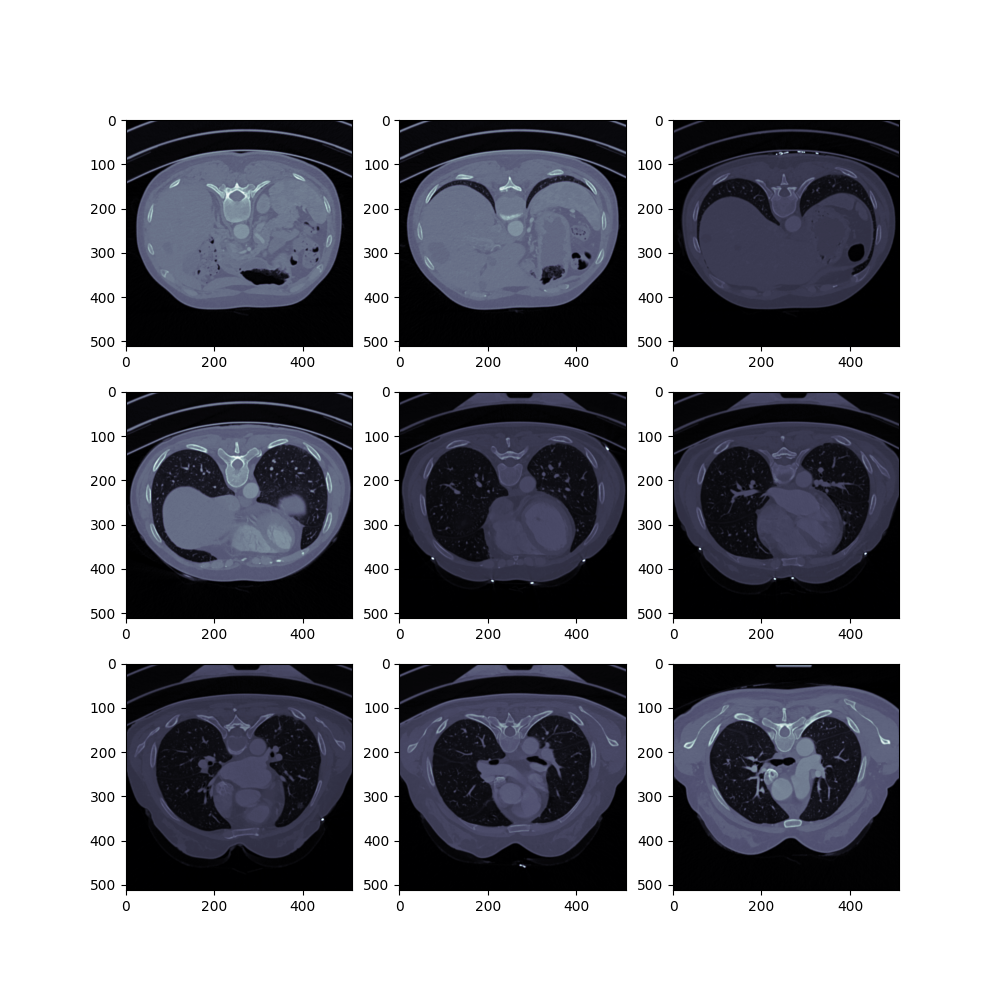

In [12]:
fig, axis = plt.subplots(3,3, figsize = (10,10))
c = 30
for i in range(3):
    for j in range(3):
        axis[i][j].imshow(np.rot90(sample_image_data[:,:,c]), cmap = 'bone'); 
        c += 20
        
# plt.title("Simpson, Amber L. et al. 'A large annotated medical image dataset for the development and evaluation of segmentation algorithms.'' (2019).");

<IPython.core.display.Javascript object>


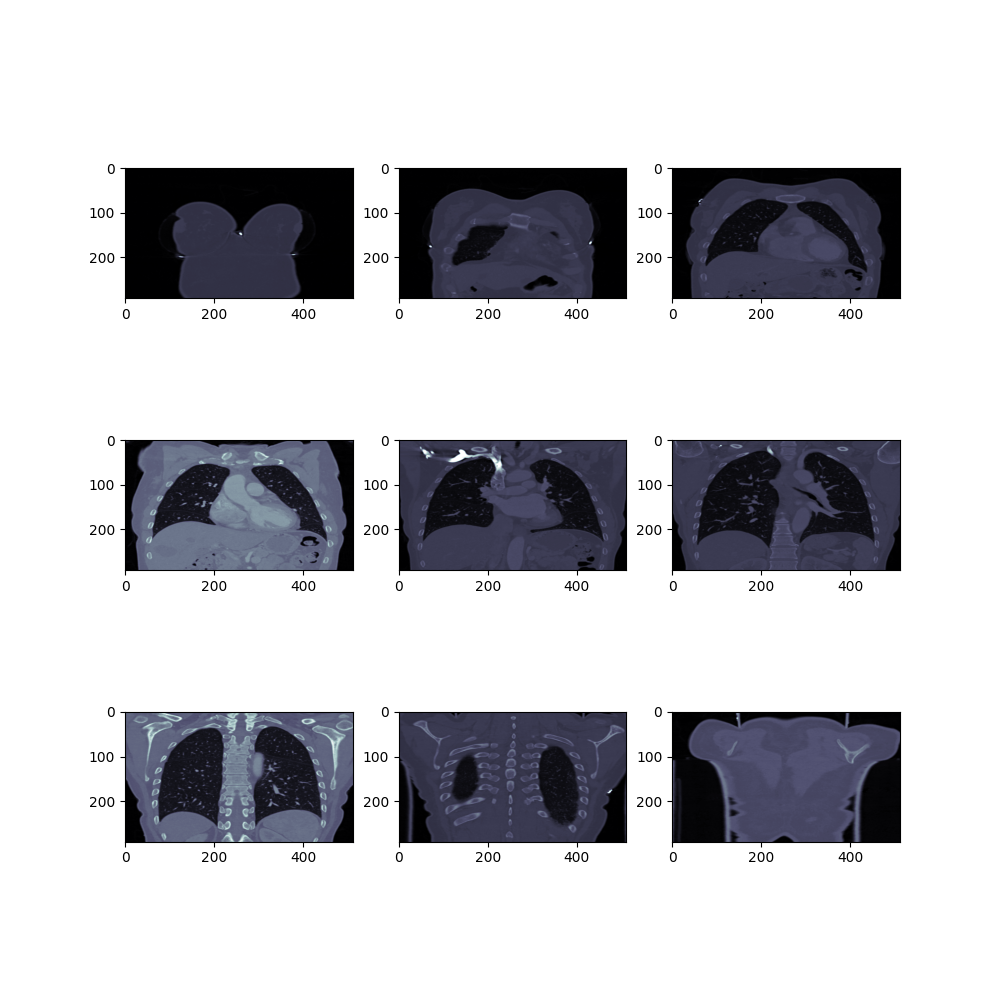

In [26]:
fig, axis = plt.subplots(3,3, figsize = (10,10))
c = 100
for i in range(3):
    for j in range(3):
        axis[i][j].imshow(np.rot90(sample_image_data[:,c,:]), cmap = 'bone'); 
        c += 40

<IPython.core.display.Javascript object>


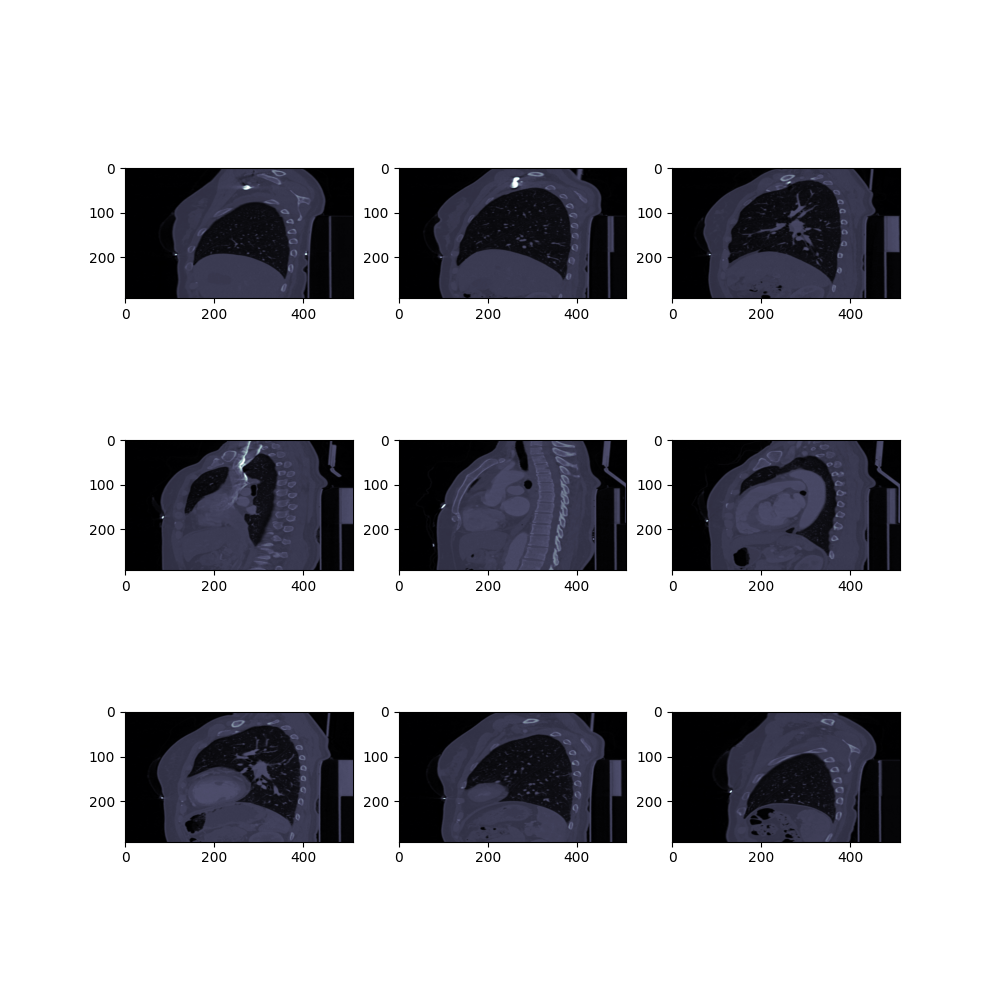

In [28]:
fig, axis = plt.subplots(3,3, figsize = (10,10))
c = 100
for i in range(3):
    for j in range(3):
        axis[i][j].imshow(np.rot90(sample_image_data[c,:,:]), cmap = 'bone'); 
        c += 40

### 3D Plot

<IPython.core.display.Javascript object>


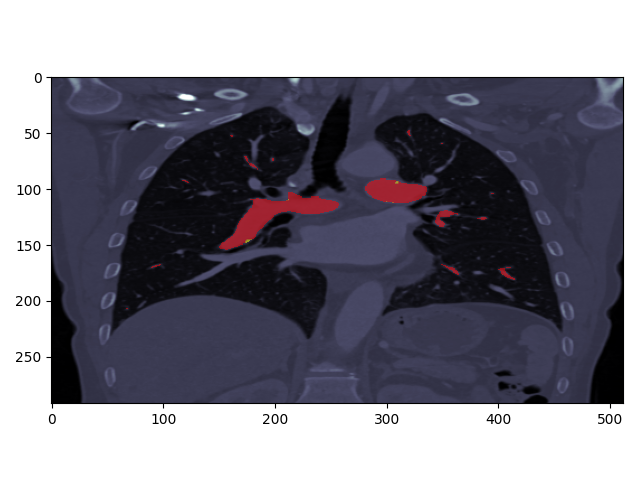

In [6]:
fig = plt.figure()
camera = Camera(fig) 
for i in range(300):  
    plt.imshow(np.rot90(sample_image_data[:,100+i,:]), cmap="bone")
    mask_ = np.ma.masked_where(sample_label_data[:,100+i,:]==0, sample_label_data[:,i,:])
    plt.imshow(np.rot90(mask_), alpha=0.5, cmap = "autumn")
    
    camera.snap() 
plt.tight_layout()
animation = camera.animate()

In [8]:
HTML(animation.to_html5_video())

### 2D Plot

<IPython.core.display.Javascript object>


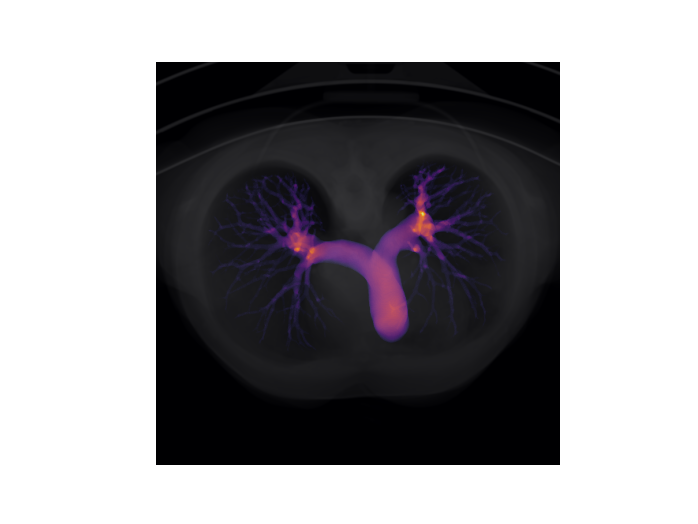

(-0.5, 511.5, 511.5, -0.5)

In [54]:
fig = plt.figure()
plt.imshow(np.rot90(sample_label_data.sum(axis=2)), cmap = "inferno")
plt.imshow(np.rot90(np.clip(sample_image_data, -700, 300).sum(axis=2)), alpha = 0.2, cmap = "gray")
plt.axis("off")

<IPython.core.display.Javascript object>


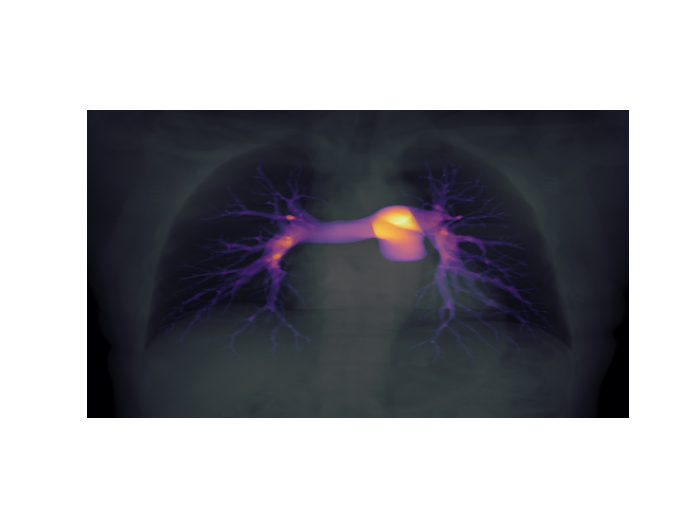

(-0.5, 511.5, 291.5, -0.5)

In [51]:
fig = plt.figure()
plt.imshow(np.rot90(np.clip(sample_image_data, -700, 300).sum(axis = 1)), cmap = "bone")
plt.imshow(np.rot90(sample_label_data.sum(axis=1)),alpha = 0.7, cmap = "inferno")
plt.axis("off")

In [13]:
nib.aff2axcodes(sample_image.affine)

('L', 'P', 'S')

In [14]:
print(len(train_image_file))

100


### Orientation Check

In [45]:
for i in train_image_file:
    file = nib.load(i)
    affine_mat = file.affine
    assert nib.aff2axcodes(affine_mat) == ('L', 'P', 'S')

In [53]:
print(np.min(sample_image_data))
print(np.max(sample_image_data))

-1024.0
3071.0


In [67]:
print(sample_image.shape)
print(sample_image.header.get_zooms())

(512, 512, 292)
(0.61328125, 0.61328125, 1.0)


In [68]:
import nibabel.processing
voxel_new_size = (2,2,2)
sample_image_resized = nibabel.processing.conform(sample_image, (256,256,128), voxel_new_size, orientation = "LPS")

In [69]:
print(sample_image_resized.shape)
print(sample_image_resized.header.get_zooms())

(256, 256, 128)
(2.0, 2.0, 2.0)


In [70]:
sample_label_resized = nibabel.processing.conform(sample_label, (256,256,128), voxel_new_size, orientation = "LPS")
print(sample_label_resized.shape)
print(sample_label_resized.header.get_zooms())

(256, 256, 128)
(2.0, 2.0, 2.0)


<IPython.core.display.Javascript object>


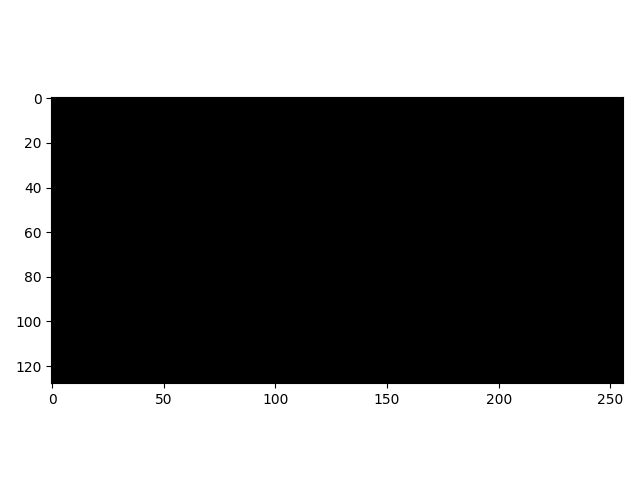

In [72]:
fig = plt.figure()
camera = Camera(fig) 
for i in range(sample_image_resized.get_fdata().shape[1]):  
    plt.imshow(np.rot90(sample_image_resized.get_fdata()[:,i,:]), cmap="bone")
    mask_ = np.ma.masked_where(sample_label_resized.get_fdata()[:,i,:]==0, sample_label_resized.get_fdata()[:,i,:])
    plt.imshow(np.rot90(mask_), alpha=0.5, cmap = "autumn")
    
    camera.snap() 
plt.tight_layout()
animation = camera.animate()

In [73]:
HTML(animation.to_html5_video())